複習一些過往的code並慢慢整理自己的codebase，並且養成每日寫data science code的習慣!

## 目標: 將過往code文件化、模組化，使其重複使用。

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# 使用官方資料，只是示意

data = load_wine(as_frame=True)
data

{'data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0      14.23        1.71  2.43               15.6      127.0           2.80   
 1      13.20        1.78  2.14               11.2      100.0           2.65   
 2      13.16        2.36  2.67               18.6      101.0           2.80   
 3      14.37        1.95  2.50               16.8      113.0           3.85   
 4      13.24        2.59  2.87               21.0      118.0           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5       95.0           1.68   
 174    13.40        3.91  2.48               23.0      102.0           1.80   
 175    13.27        4.28  2.26               20.0      120.0           1.59   
 176    13.17        2.59  2.37               20.0      120.0           1.65   
 177    14.13        4.10  2.74               24.5       96.0           2.05   
 
      flavanoids  nonflavanoid

In [9]:
X = data['data']
y = data['target']

## Day12 - Q: 特徵轉換
通常會去使用特徵轉換使得模型可以利用特徵，如標準化、類別化等等，常常是特徵工程的關鍵一步。

In [10]:
# boxcox 轉換

import scipy.stats

(array([18., 59., 33., 16., 14., 11., 14.,  7.,  3.,  3.]),
 array([0.74 , 1.246, 1.752, 2.258, 2.764, 3.27 , 3.776, 4.282, 4.788,
        5.294, 5.8  ]),
 <a list of 10 Patch objects>)

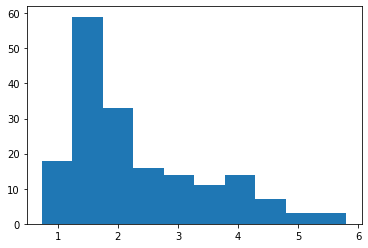

In [16]:
# 相對偏態嚴重

plt.hist(X.iloc[:, 1])

([array([ 1.,  8.,  8., 15., 49., 29., 15., 20., 24.,  9.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])],
 array([-0.31405482, -0.14356892,  0.02691698,  0.19740288,  0.36788878,
         0.53837468,  0.70886058,  0.87934648,  1.04983238,  1.22031828,
         1.39080418]),
 <a list of 2 Lists of Patches objects>)

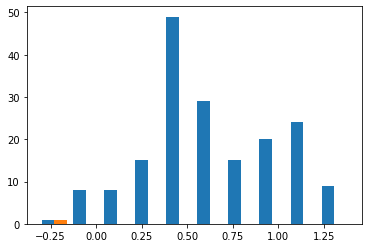

In [17]:
# 透過boxcox轉換

plt.hist(scipy.stats.boxcox(X.iloc[:, 1]))

> 可以看到相對偏態更不明顯了。

In [24]:
# 計算特徵的偏態來確認。

# 原始特徵
raw_mean = X.iloc[:, 1].mean()
raw_std = X.iloc[:, 1].std()
raw_skewness = np.mean(((X.iloc[:, 1] - raw_mean) / raw_std)**3)
print(f'原始特徵偏態: {raw_skewness}')

# boxcox轉換後
boxcox_x = scipy.stats.boxcox(X.iloc[:, 1])[0] # 記住需要, 會回傳tuple
boxcox_mean = boxcox_x.mean()
boxcox_std = boxcox_x.std()
boxcox_skewness = np.mean(((boxcox_x - boxcox_mean) / boxcox_std)**3)
print(f'原始特徵偏態: {boxcox_skewness}')

原始特徵偏態: 1.022194607729363
原始特徵偏態: 0.02682680260856026


> 可以看到計算的數值偏態也是變得更小了！後續可以搭配模型去結合比較。